In [1]:
import os
import json
from typing import Dict, List
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords


from requests import get

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from env import github_token
from env import github_username

import acquire_titanic
import prep

In [2]:
df = acquire_titanic.scrape_github_data()


In [3]:
df = prep.prep_articles(df)


In [4]:
df.clean[112]

'titanicexample'

In [5]:
df.head()

,language,repo,original,stemmed,lemmatized,clean
0,JavaScript,icons8/titanic,# Titanic\n\nA collection of animated icons + ...,titan a collect of anim icon javascript librar...,titanic a collection of animated icon javascri...,titanic collection animated icons javascript l...
1,Java,romainpiel/Titanic,# Titanic for Android\n\nThis library is DEPRE...,titan for android thi librari is deprec as i d...,titanic for android this library is deprecated...,titanic android library deprecated ' time main...
2,Jupyter Notebook,agconti/kaggle-titanic,### Kaggle-titanic\nThis is a tutorial in an I...,kaggletitan thi is a tutori in an ipython note...,kaggletitanic this is a tutorial in an ipython...,kaggletitanic tutorial ipython notebook kaggle...
3,Jupyter Notebook,HanXiaoyang/Kaggle_Titanic,# Kaggle_Titanic\nthe data and ipython noteboo...,kaggletitan the data and ipython notebook of m...,kaggletitanic the data and ipython notebook of...,kaggletitanic data ipython notebook attempt so...
4,R,trevorstephens/titanic,Titanic: Machine Learning from Disaster - Gett...,titan machin learn from disast get start with ...,titanic machine learning from disaster getting...,titanic machine learning disaster getting star...


In [6]:
df.language.value_counts(dropna=False)

Jupyter Notebook    80
Python              39
R                   18
NaN                 10
HTML                 9
JavaScript           7
Java                 4
Scala                4
F#                   2
PHP                  1
OpenEdge ABL         1
Processing           1
C++                  1
Rust                 1
Clojure              1
C                    1
Name: language, dtype: int64

In [7]:
labels = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
Jupyter Notebook,80,0.470588
Python,39,0.229412
R,18,0.105882
HTML,9,0.052941
JavaScript,7,0.041176
Java,4,0.023529
Scala,4,0.023529
F#,2,0.011765
PHP,1,0.005882
OpenEdge ABL,1,0.005882


In [8]:
easy_df = df.drop(columns =(['repo', 'original', 'stemmed', 'lemmatized']))
easy_df

,language,clean
0,JavaScript,titanic collection animated icons javascript l...
1,Java,titanic android library deprecated ' time main...
2,Jupyter Notebook,kaggletitanic tutorial ipython notebook kaggle...
3,Jupyter Notebook,kaggletitanic data ipython notebook attempt so...
4,R,titanic machine learning disaster getting star...
5,Jupyter Notebook,score 08134 titanic kaggle challenge titanic c...
6,Jupyter Notebook,error readme
7,Jupyter Notebook,make first kaggle submission jupyter notebook ...
8,Jupyter Notebook,error readme
9,Jupyter Notebook,important ' planning code along make sure clon...


In [9]:
breakouts = pd.concat([easy_df.language.value_counts(),
                    easy_df.language.value_counts(normalize=True)], axis=1)
breakouts.columns = ['n', 'percent']
breakouts

,n,percent
Jupyter Notebook,80,0.470588
Python,39,0.229412
R,18,0.105882
HTML,9,0.052941
JavaScript,7,0.041176
Java,4,0.023529
Scala,4,0.023529
F#,2,0.011765
PHP,1,0.005882
OpenEdge ABL,1,0.005882


In [10]:
all_text = " ".join(easy_df.clean)
all_text = all_text.split()
all_text_counts = pd.Series(all_text).value_counts()

jupyter_text = " ".join(easy_df[easy_df.language == "Jupyter Notebook"].clean)
jupyter_text = jupyter_text.split()
jupyter_text_counts = pd.Series(jupyter_text).value_counts()

python_text = " ".join(easy_df[easy_df.language == "Python"].clean)
python_text = python_text.split()
python_text_counts = pd.Series(python_text).value_counts()

r_text = " ".join(easy_df[easy_df.language == "R"].clean)
r_text = r_text.split()
r_text_counts = pd.Series(r_text).value_counts()

html_text = " ".join(easy_df[easy_df.language == "HTML"].clean)
html_text = html_text.split()
html_text_counts = pd.Series(html_text).value_counts()

javascript_text = " ".join(easy_df[easy_df.language == "JavaScript"].clean)
javascript_text = javascript_text.split()
javascript_text_counts = pd.Series(javascript_text).value_counts()

java_text = " ".join(easy_df[easy_df.language == "Java"].clean)
java_text = java_text.split()
java_text_counts = pd.Series(java_text).value_counts()

scala_text = " ".join(easy_df[easy_df.language == "Scala"].clean)
scala_text = scala_text.split()
scala_text_counts = pd.Series(scala_text).value_counts()

fsharp_text = " ".join(easy_df[easy_df.language == "F#"].clean)
fsharp_text = fsharp_text.split()
fsharp_text_counts = pd.Series(fsharp_text).value_counts()

rust_text = " ".join(easy_df[easy_df.language == "Rust"].clean)
rust_text = rust_text.split()
rust_text_counts = pd.Series(rust_text).value_counts()

clojure_text = " ".join(easy_df[easy_df.language == "Clojure"].clean)
clojure_text = clojure_text.split()
clojure_text_counts = pd.Series(clojure_text).value_counts()

processing_text = " ".join(easy_df[easy_df.language == "Processing"].clean)
processing_text = processing_text.split()
processing_text_counts = pd.Series(processing_text).value_counts()

php_text = " ".join(easy_df[easy_df.language == "PHP"].clean)
php_text = php_text.split()
php_text_counts = pd.Series(php_text).value_counts()


c_text = " ".join(easy_df[easy_df.language == "C"].clean)
c_text = c_text.split()
c_text_counts = pd.Series(c_text).value_counts()

openedge_text = " ".join(easy_df[easy_df.language == "OpenEdge ABL"].clean)
openedge = openedge_text.split()
openedge_text_counts = pd.Series(openedge_text).value_counts()


cplus_text = " ".join(easy_df[easy_df.language == "C++"].clean)
cplus_text = cplus_text.split()
cplus_text_counts = pd.Series(cplus_text).value_counts()




In [11]:
word_counts = (pd.concat([all_text_counts, jupyter_text_counts, python_text_counts, r_text_counts, html_text_counts, javascript_text_counts, java_text_counts, scala_text_counts, fsharp_text_counts, rust_text_counts, clojure_text_counts, processing_text_counts, php_text_counts, c_text_counts, openedge_text_counts, cplus_text_counts], axis=1, sort=True)
                .set_axis(['all', 'jupyter', 'python', 'r', 'html', 'javascript', 'java', 'scala', 'fsharp', 'rust', 'clojure', 'processing', 'php', 'c', 'openedge', 'cplus'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
word_counts

,all,jupyter,python,r,html,javascript,java,scala,fsharp,rust,clojure,processing,php,c,openedge,cplus
&#9;,73,35,38,0,0,0,0,0,0,0,0,0,0,0,0,0
',2079,1862,129,14,6,12,25,0,1,4,2,4,0,0,0,0
0,127,110,7,1,4,0,4,0,0,0,0,0,0,0,0,0
0000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
0000048,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000010001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0001,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0001115,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0006316,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
word_counts.sort_values(by='all', ascending=False
                       ).head(10)

word_counts.columns

Index(['all', 'jupyter', 'python', 'r', 'html', 'javascript', 'java', 'scala',
       'fsharp', 'rust', 'clojure', 'processing', 'php', 'c', 'openedge',
       'cplus'],
      dtype='object')

In [13]:
pd.concat([word_counts[word_counts.jupyter == 0].sort_values(by='jupyter').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='python').tail(6),
          word_counts[word_counts.r == 0].sort_values(by='r').tail(6),
           word_counts[word_counts.html == 0].sort_values(by='html').tail(6),
           word_counts[word_counts.javascript == 0].sort_values(by='javascript').tail(6),
           word_counts[word_counts.java == 0].sort_values(by='java').tail(6),
          word_counts[word_counts.scala == 0].sort_values(by='scala').tail(6),
           word_counts[word_counts.fsharp == 0].sort_values(by='fsharp').tail(6),
           word_counts[word_counts.rust == 0].sort_values(by='rust').tail(6),
           word_counts[word_counts.clojure == 0].sort_values(by='clojure').tail(6),
           word_counts[word_counts.processing == 0].sort_values(by='processing').tail(6),
           word_counts[word_counts.php == 0].sort_values(by='php').tail(6),
           word_counts[word_counts.c == 0].sort_values(by='c').tail(6),
           word_counts[word_counts.openedge == 0].sort_values(by='openedge').tail(6),
           word_counts[word_counts.cplus == 0].sort_values(by='cplus').tail(6),])

,all,jupyter,python,r,html,javascript,java,scala,fsharp,rust,clojure,processing,php,c,openedge,cplus
flake8,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
flag,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
five,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
fiturx1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
generic,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
zoom,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
frame,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fractional,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fraction,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fractextmisclassificationsttextobservationst,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
word_counts.columns

Index(['all', 'jupyter', 'python', 'r', 'html', 'javascript', 'java', 'scala',
       'fsharp', 'rust', 'clojure', 'processing', 'php', 'c', 'openedge',
       'cplus'],
      dtype='object')

In [15]:
top_20_text_bigrams = (pd.Series(nltk.ngrams(all_text, 2))
                      .value_counts()
                      .head(20))

top_20_jupyter_bigrams = (pd.Series(nltk.ngrams(jupyter_text, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams = (pd.Series(nltk.ngrams(python_text, 2))
                      .value_counts()
                      .head(20))

top_20_r_bigrams = (pd.Series(nltk.ngrams(r_text, 2))
                      .value_counts()
                      .head(20))

top_20_html_bigrams = (pd.Series(nltk.ngrams(html_text, 2))
                      .value_counts()
                      .head(20))



top_20_javascript_bigrams = (pd.Series(nltk.ngrams(javascript_text, 2))
                      .value_counts()
                      .head(20))

top_20_java_bigrams = (pd.Series(nltk.ngrams(java_text, 2))
                      .value_counts()
                      .head(20))

top_20_scala_bigrams = (pd.Series(nltk.ngrams(scala_text, 2))
                      .value_counts()
                      .head(20))

top_20_fsharp_bigrams = (pd.Series(nltk.ngrams(fsharp_text, 2))
                      .value_counts()
                      .head(20))



top_20_rust_bigrams = (pd.Series(nltk.ngrams(rust_text, 2))
                      .value_counts()
                      .head(20))

top_20_clojure_bigrams = (pd.Series(nltk.ngrams(clojure_text, 2))
                      .value_counts()
                      .head(20))
top_20_processing_bigrams = (pd.Series(nltk.ngrams(processing_text, 2))
                      .value_counts()
                      .head(20))

top_20_php_bigrams = (pd.Series(nltk.ngrams(php_text, 2))
                      .value_counts()
                      .head(20))



top_20_c_bigrams = (pd.Series(nltk.ngrams(c_text, 2))
                      .value_counts()
                      .head(20))

top_20_openedge_bigrams = (pd.Series(nltk.ngrams(openedge_text, 2))
                      .value_counts()
                      .head(20))

top_20_cplus_bigrams = (pd.Series(nltk.ngrams(cplus_text, 2))
                      .value_counts()
                      .head(20))

In [16]:
top_20_jupyter_bigrams

(tr, tr)               322
(td0td, td0td)         201
(', ')                 176
(tbody, tr)            120
(td1td, td0td)         100
(td0td, tr)             99
(machine, learning)     96
(dataframe, tbody)      80
(td0td, td3td)          56
(891, nonnull)          55
(td1td, td1td)          55
(tdnantd, tdstd)        54
(td0td, td1td)          52
(td3td, td1td)          51
(nonnull, int64)        50
(td1td, tr)             50
(let, ')                49
(', age)                47
(survived, ')           44
(', survived)           42
dtype: int64

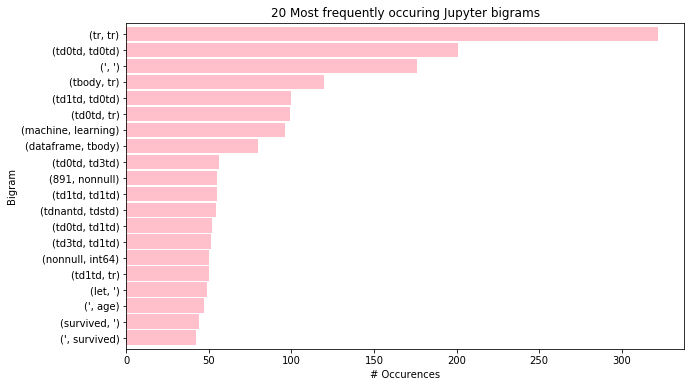

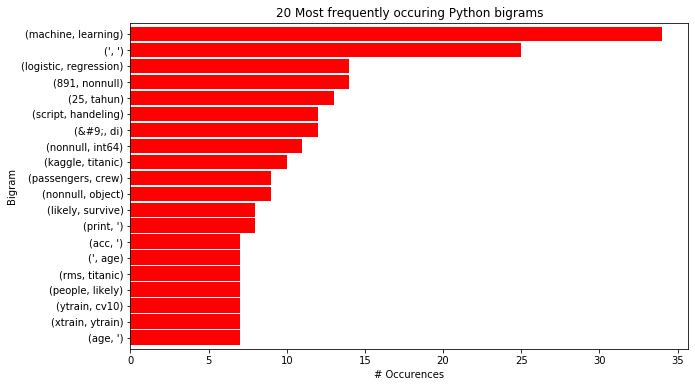

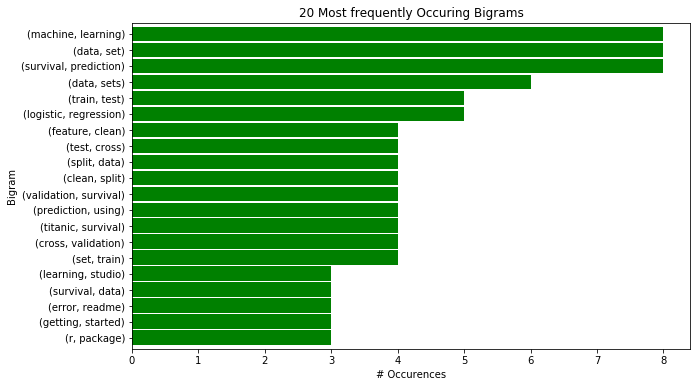

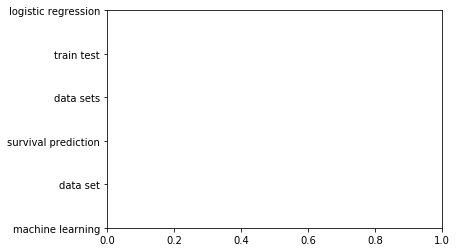

In [20]:
top_20_jupyter_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Jupyter bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurences')
plt.show()
# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_jupyter_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

top_20_python_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurences')
plt.show()
# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

top_20_r_bigrams.sort_values().plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurences')
plt.show()
# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_r_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)